<a href="https://colab.research.google.com/github/Baaaaam/Baam/blob/master/SSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 36kB/s 
     |████████████████████████████████| 419kB 48.3MB/s 
     |████████████████████████████████| 3.0MB 42.6MB/s 
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive") #save파일은 여기서 생성될 것임

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train_file = "/content/drive/My Drive/Colab Notebooks/obj.zip"

In [ ]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall()

In [ ]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):     #train images의 이름에 따라 2,1,0으로 labeling 하는 function
    if "can" in file_name:
      return 2
    if "glass" in file_name:
      return 1
    else:
      return 0

train_path = "./obj/"
image_files = os.listdir(train_path) #디렉토리에 있는 이미지 파일들을 리스트화
train_images = [load_image(train_path + file) for file in image_files] #데이타 사진프레임의 개체를 opencv라이브러리를 사용하여 images를 read하고 data frame리스트화
train_labels = [extract_label(file) for file in image_files] #labelling set으로 리스트화
print(train_images)

[array([[[120, 127, 130],
        [120, 127, 130],
        [119, 126, 129],
        ...,
        [ 16,  11,  10],
        [ 16,  11,  10],
        [ 16,  11,  10]],

       [[120, 127, 130],
        [119, 126, 129],
        [119, 126, 129],
        ...,
        [ 15,  10,   9],
        [ 16,  11,  10],
        [ 16,  11,  10]],

       [[118, 125, 128],
        [118, 125, 128],
        [119, 126, 129],
        ...,
        [ 15,  10,   9],
        [ 15,  10,   9],
        [ 16,  11,  10]],

       ...,

       [[173, 175, 176],
        [173, 175, 176],
        [173, 175, 176],
        ...,
        [206, 202, 201],
        [213, 209, 208],
        [215, 211, 210]],

       [[173, 175, 176],
        [173, 175, 176],
        [173, 175, 176],
        ...,
        [201, 197, 196],
        [211, 207, 206],
        [206, 202, 201]],

       [[174, 176, 177],
        [174, 176, 177],
        [174, 176, 177],
        ...,
        [204, 200, 199],
        [197, 193, 192],
        [201, 197, 196]

In [ ]:
!ls

drive  obj  sample_data


In [ ]:
def preprocess_image(img, side=96):            # 전처리를 위한 function
    min_side = min(img.shape[0], img.shape[1]) #img.shape[0]가 row, image shape[1]가 coulmn.
    img = img[:min_side, :min_side] # setting aspect ratio as square
    img = cv2.resize(img, (side,side)) #resize 96 by 96
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #grayscalize
    return img / 255.0

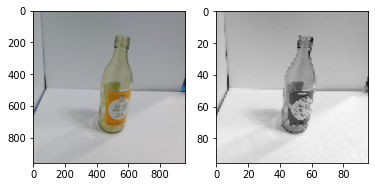

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

preview_index = 1
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [ ]:

for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [ ]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1) #expand the last dimension to be a single channel
#train_images = np.expand_dims(train_images, axis=1) #--이걸로 차이 확인 가능
#train_images = np.squeeze(train_images, axis=-1 #--squeeze는 axis를 없앰
train_labels = np.array(train_labels) #array화 시킴=열로 만듬
print(train_images.shape, train_labels.shape)

(245, 96, 96, 1) (245,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(train_labels[1])

1


In [ ]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)
from keras import backend as K
print(K.image_data_format())

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=3, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=10)
model.save_weights("model.tf")


Tensorflow: 2.0.0-alpha0
channels_last
Epoch 1/10
245/245 [==============================] - 2s 8ms/sample - loss: 1.1062 - sparse_categorical_accuracy: 0.3429
Epoch 2/10
245/245 [==============================] - 2s 7ms/sample - loss: 1.0970 - sparse_categorical_accuracy: 0.3959
Epoch 3/10
245/245 [==============================] - 2s 7ms/sample - loss: 1.0571 - sparse_categorical_accuracy: 0.5184
Epoch 4/10
245/245 [==============================] - 2s 7ms/sample - loss: 0.9238 - sparse_categorical_accuracy: 0.6041
Epoch 5/10
245/245 [==============================] - 2s 7ms/sample - loss: 1.0498 - sparse_categorical_accuracy: 0.5020
Epoch 6/10
245/245 [==============================] - 2s 7ms/sample - loss: 0.9609 - sparse_categorical_accuracy: 0.5592
Epoch 7/10
245/245 [==============================] - 2s 7ms/sample - loss: 0.7573 - sparse_categorical_accuracy: 0.6571
Epoch 8/10
245/245 [==============================] - 2s 7ms/sample - loss: 0.6690 - sparse_categorical_accuracy: 

In [ ]:
from google.colab import files
uploads = files.upload()

Saving test_can.jpg to test_can (3).jpg
Saving test_glass.jpg to test_glass (3).jpg
Saving test_pet.jpg to test_pet (3).jpg


In [ ]:
uploads

{'test_can.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x03\xc0\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x03\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\xff\xc4\x00Q\x10\x00\x01\x03\x02\x05\x02\x04\x04\x03\x05\x05\x05\x06\x03\x05\t\x01\x00\x02\x11!1\x03\x04\x12AQ\x05a\x06"q\x81\x07\x13\x91\xa12\xb1\xc1\x14BR\xd1\xe1\x08\x15#\xf0\xf13br\x82\

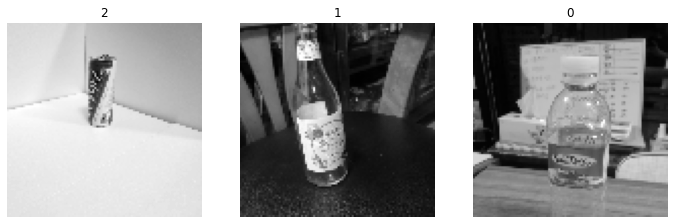

In [ ]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()] #uploads.keys() 는 dictionary의 key와 value중에 key만 return
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf") #이걸로 학습된 모델을 사용
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title(np.argmax(eval_predictions[i]))
    plt.axis('off')

In [ ]:
files.download("model.tf.index")